# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [1]:
#!pip install tensorflow --user
#!pip install keras --user


Empezamos importando librerías

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [3]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [4]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

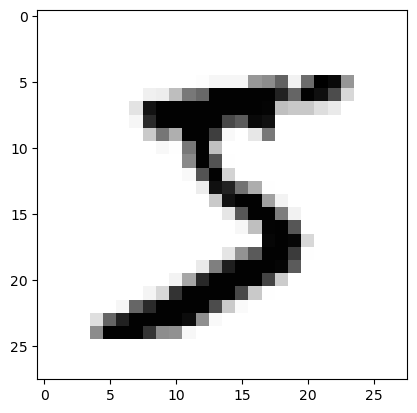

In [6]:
import matplotlib.pyplot as plt
import matplotlib

plt.imshow(X_train[0], cmap=matplotlib.colormaps['Greys']);

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [7]:
0/255

0.0

In [8]:
128/255

0.5019607843137255

In [9]:
255/255

1.0

In [10]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [11]:
np.mean(X_train)

0.13066062

In [12]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [14]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [15]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [16]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

In [17]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

In [18]:
28*28

784

Podemos ver las capas, y acceder a sus elementos

In [19]:
print(model.layers[0])

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [20]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [21]:
weights.shape

(784, 300)

In [22]:
biases.shape

(300,)

In [23]:
#weights

In [24]:
28*28

784

In [25]:
len(weights[0])

300

In [26]:
28*28

784

In [27]:
300*784

235200

In [28]:
weights.size

235200

In [29]:
biases[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

Establecemos la configuración de ejecución... el compile.

In [30]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [31]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [32]:
784*300 + 300

235500

In [33]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
300*28*28 + 300


235500

Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [35]:
X_train.shape

(50000, 28, 28)

In [36]:
50000/128

390.625

In [37]:
50000/128

390.625

In [38]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50
391/391 [==============================] - 5s 10ms/step - loss: 1.2543 - accuracy: 0.6973 - val_loss: 0.6062 - val_accuracy: 0.8608
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 0.5233 - accuracy: 0.8654 - val_loss: 0.3995 - val_accuracy: 0.8960
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 0.4032 - accuracy: 0.8902 - val_loss: 0.3388 - val_accuracy: 0.9064
Epoch 4/50
391/391 [==============================] - 3s 9ms/step - loss: 0.3534 - accuracy: 0.9006 - val_loss: 0.3057 - val_accuracy: 0.9152
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 0.3235 - accuracy: 0.9080 - val_loss: 0.2852 - val_accuracy: 0.9200
Epoch 6/50
391/391 [==============================] - 3s 8ms/step - loss: 0.3018 - accuracy: 0.9145 - val_loss: 0.2696 - val_accuracy: 0.9238
Epoch 7/50
391/391 [==============================] - 4s 9ms/step - loss: 0.2847 - accuracy: 0.9191 - val_loss: 0.2564 - val_accuracy: 0.9279
Epoch

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [39]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0854 - accuracy: 0.9766 - val_loss: 0.1073 - val_accuracy: 0.9701
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0823 - accuracy: 0.9775 - val_loss: 0.1099 - val_accuracy: 0.9698
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0794 - accuracy: 0.9787 - val_loss: 0.1035 - val_accuracy: 0.9714
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0767 - accuracy: 0.9798 - val_loss: 0.1024 - val_accuracy: 0.9715
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0739 - accuracy: 0.9799 - val_loss: 0.1007 - val_accuracy: 0.9717
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0714 - accuracy: 0.9812 - val_loss: 0.0978 - val_accuracy: 0.9730
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0690 - accuracy: 0.9816 - val_loss: 0.0977 - val_accuracy: 0.9729
Epoch 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [40]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 50, 'steps': 391}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


{'loss': [1.254263162612915,
  0.5232710838317871,
  0.4031829237937927,
  0.3533722758293152,
  0.32352739572525024,
  0.3017716109752655,
  0.28474199771881104,
  0.2702159881591797,
  0.25767871737480164,
  0.24660146236419678,
  0.23662972450256348,
  0.22733746469020844,
  0.21908999979496002,
  0.21103636920452118,
  0.2038680911064148,
  0.1970602124929428,
  0.19047947227954865,
  0.1846739500761032,
  0.17913731932640076,
  0.17364130914211273,
  0.16842466592788696,
  0.1638558804988861,
  0.1591237485408783,
  0.15487629175186157,
  0.15049275755882263,
  0.1468019038438797,
  0.14290358126163483,
  0.13928493857383728,
  0.1358666568994522,
  0.13251878321170807,
  0.12934847176074982,
  0.12631213665008545,
  0.12326756119728088,
  0.12033841758966446,
  0.11759462207555771,
  0.11510517448186874,
  0.11249495297670364,
  0.10999283939599991,
  0.1077006384730339,
  0.10549763590097427,
  0.10314838588237762,
  0.10089126974344254,
  0.09885882586240768,
  0.09695960581302

In [41]:
history.history

{'loss': [1.254263162612915,
  0.5232710838317871,
  0.4031829237937927,
  0.3533722758293152,
  0.32352739572525024,
  0.3017716109752655,
  0.28474199771881104,
  0.2702159881591797,
  0.25767871737480164,
  0.24660146236419678,
  0.23662972450256348,
  0.22733746469020844,
  0.21908999979496002,
  0.21103636920452118,
  0.2038680911064148,
  0.1970602124929428,
  0.19047947227954865,
  0.1846739500761032,
  0.17913731932640076,
  0.17364130914211273,
  0.16842466592788696,
  0.1638558804988861,
  0.1591237485408783,
  0.15487629175186157,
  0.15049275755882263,
  0.1468019038438797,
  0.14290358126163483,
  0.13928493857383728,
  0.1358666568994522,
  0.13251878321170807,
  0.12934847176074982,
  0.12631213665008545,
  0.12326756119728088,
  0.12033841758966446,
  0.11759462207555771,
  0.11510517448186874,
  0.11249495297670364,
  0.10999283939599991,
  0.1077006384730339,
  0.10549763590097427,
  0.10314838588237762,
  0.10089126974344254,
  0.09885882586240768,
  0.09695960581302

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.254263,0.69730,0.606211,0.8608
1,0.523271,0.86544,0.399516,0.8960
2,0.403183,0.89022,0.338780,0.9064
3,0.353372,0.90058,0.305749,0.9152
4,0.323527,0.90796,0.285163,0.9200
5,0.301772,0.91448,0.269637,0.9238
6,0.284742,0.91914,0.256443,0.9279
7,0.270216,0.92316,0.246086,0.9300
8,0.257679,0.92694,0.234870,0.9344
9,0.246601,0.92954,0.226041,0.9372


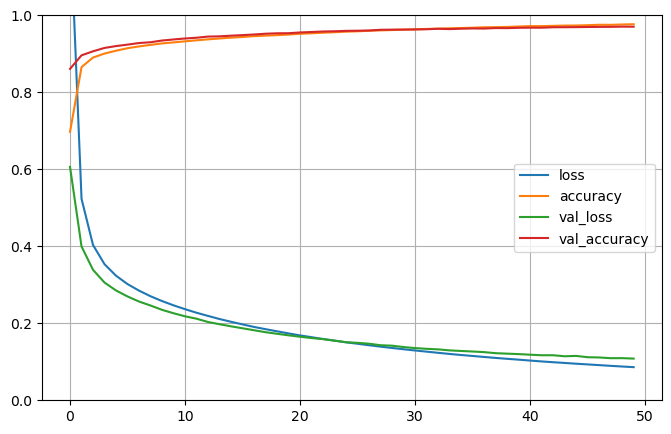

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [45]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 1s 4ms/step - loss: 0.0896 - accuracy: 0.9736


[0.08964236080646515, 0.9735999703407288]

C:\Users\Admin\AppData\Local\Temp\ipykernel_27496\1468152043.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


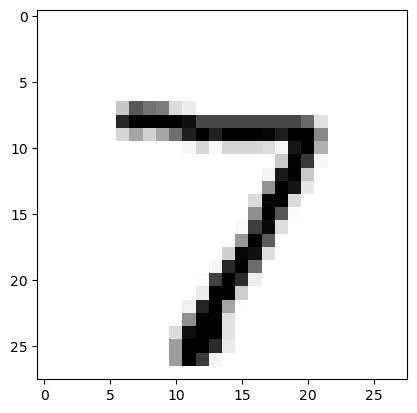

In [46]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [47]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [48]:
predictions = model.predict(X_test[:1]).round(3)
print(predictions.shape)
predictions

1/1 [==============================] - 0s 270ms/step
(1, 10)


array([[0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.997, 0.   ,
        0.   ]], dtype=float32)

In [49]:
predictions.argmax()

7

In [50]:
model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [51]:
y_test[0]

7.0

C:\Users\Admin\AppData\Local\Temp\ipykernel_27496\1084033691.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_test[2].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


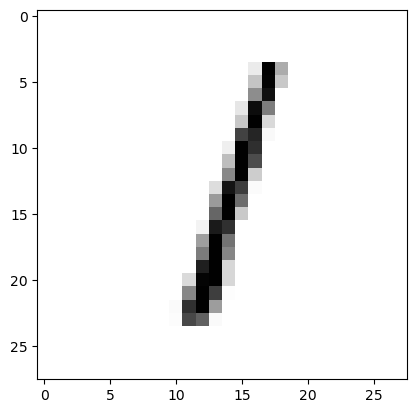

In [52]:
plt.imshow(X_test[2].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [53]:
#housing.keys()

In [54]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [55]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [56]:
X_train.shape

(11610, 8)

In [57]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_valid)))
print(np.any(np.isnan(X_test)))

False
False
False


Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [58]:
X_train.shape

(11610, 8)

In [59]:
X_train.shape[1:]

(8,)

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD()

model.compile(loss = "mean_squared_error",
             optimizer = optimizer) 

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 1.1183 - val_loss: 0.9820
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5514 - val_loss: 0.4609
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4808 - val_loss: 0.4298
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4489 - val_loss: 0.4106
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4305 - val_loss: 0.3959
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4163 - val_loss: 0.3865
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4065 - val_loss: 0.3784
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3990 - val_loss: 0.3746
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3948 - val_loss: 0.3727
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3882 - val_loss: 0.3674

In [61]:
8*30 + 30

270

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                270       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3562
0.3561788499355316


In [64]:
y_pred = model.predict(X_test[:5])
y_pred

1/1 [==============================] - 0s 110ms/step


array([[1.1921971],
       [1.9155947],
       [4.2273245],
       [1.9911076],
       [0.9254875]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras. 

In [65]:
model.save("my_keras_model.keras")

In [66]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.keras")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [67]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.keras")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.3574
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3544
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3556
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3504
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3497
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3477
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3462
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3444
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3429
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3418
Epoch 11/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3402
Epoch 12/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3398
Epoch 13/30
363/363 [====

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [68]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
history = model.fit(X_train,
                   y_train,
                   epochs=20,
                    validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb])

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3244 - val_loss: 0.3278
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3234 - val_loss: 0.3234
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3229 - val_loss: 0.3265
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3228 - val_loss: 0.3233
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3224 - val_loss: 0.3223
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3215 - val_loss: 0.3223
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3206 - val_loss: 0.3238
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3206 - val_loss: 0.3283
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3215 - val_loss: 0.3229
Epoch 10/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3195 - val_loss: 0.3210